# CSC 2309 Final Project implementation
Course: CSC2309                         
Friday, December 16, 2022,        
Ayoub Maimmadi,
Fouzya Kharmachi, 
Fatima zahra Bahjawi, 

Instructor: Dr.Nasser Assem

## Introduction
Our goal is to effectively predict heart attacks before they happen. 
The reason we chose this specific dataset is because of the rapid increase in heart attack cases in our country, 
and we want to figure out the causes and reasons for such a disease to happen, and how it relates to other physiological 
factors in our bodies.
using data easily obtainable from Kaggle, a data science company.

### Data Description

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
# Reading the Dataset from the CVS file
heart = pd.read_csv("heart.csv")

In [3]:
heart.head(30)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **2. Plotting the Graphs**

<AxesSubplot:ylabel='Frequency'>

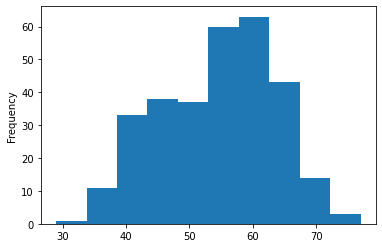

In [6]:
heart["age"].plot.hist()

<AxesSubplot:xlabel='sex', ylabel='count'>

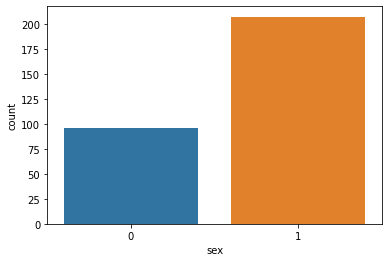

In [7]:
sns.countplot(x="sex", data=heart)

<AxesSubplot:xlabel='cp', ylabel='count'>

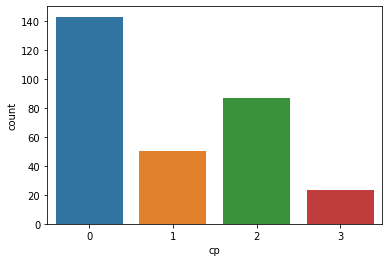

In [8]:
sns.countplot(x="cp", data=heart)

<AxesSubplot:ylabel='Frequency'>

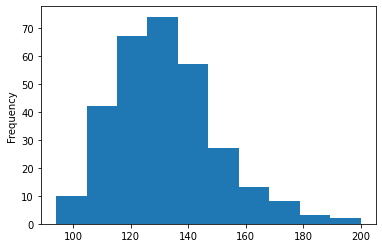

In [9]:
heart["trestbps"].plot.hist()

(array([ 12.,  73., 106.,  69.,  35.,   3.,   4.,   0.,   0.,   1.]),
 array([126. , 169.8, 213.6, 257.4, 301.2, 345. , 388.8, 432.6, 476.4,
        520.2, 564. ]),
 <BarContainer object of 10 artists>)

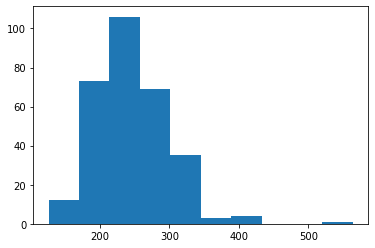

In [10]:
plt.hist(heart.chol)

<AxesSubplot:xlabel='fbs', ylabel='count'>

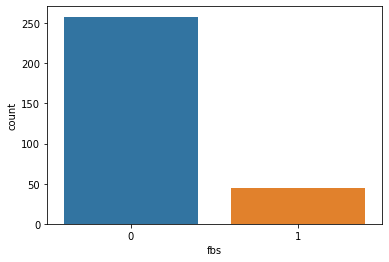

In [11]:
sns.countplot(x="fbs", data=heart)

<AxesSubplot:xlabel='restecg', ylabel='count'>

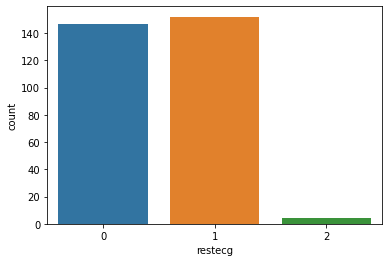

In [12]:
sns.countplot(x="restecg", data=heart)

<AxesSubplot:ylabel='Frequency'>

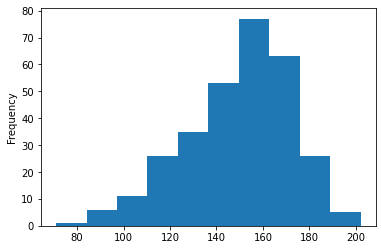

In [13]:
heart["thalach"].plot.hist()

<AxesSubplot:xlabel='exang', ylabel='count'>

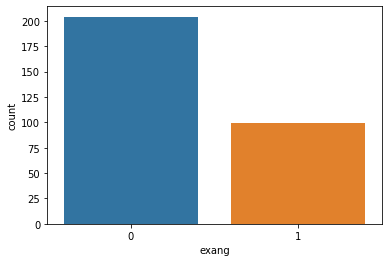

In [14]:
sns.countplot(x="exang", data=heart)

<AxesSubplot:ylabel='Frequency'>

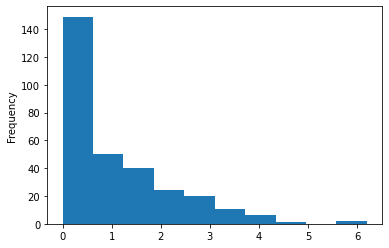

In [15]:
heart["oldpeak"].plot.hist()

<AxesSubplot:xlabel='slope', ylabel='count'>

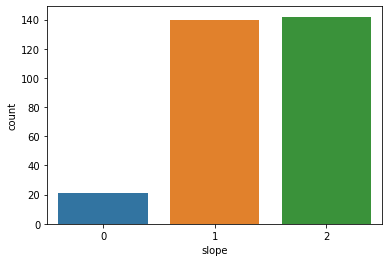

In [16]:
sns.countplot(x="slope", data=heart)

<AxesSubplot:xlabel='ca', ylabel='count'>

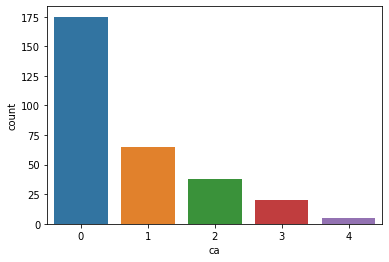

In [17]:
sns.countplot(x="ca", data=heart)

<AxesSubplot:xlabel='thal', ylabel='count'>

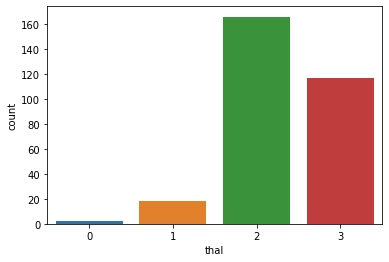

In [18]:
sns.countplot(x="thal", data=heart)

<AxesSubplot:xlabel='target', ylabel='count'>

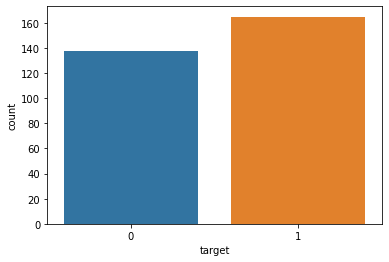

In [19]:
sns.countplot(x="target", data=heart)

C:\Users\maimm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol', ylabel='count'>

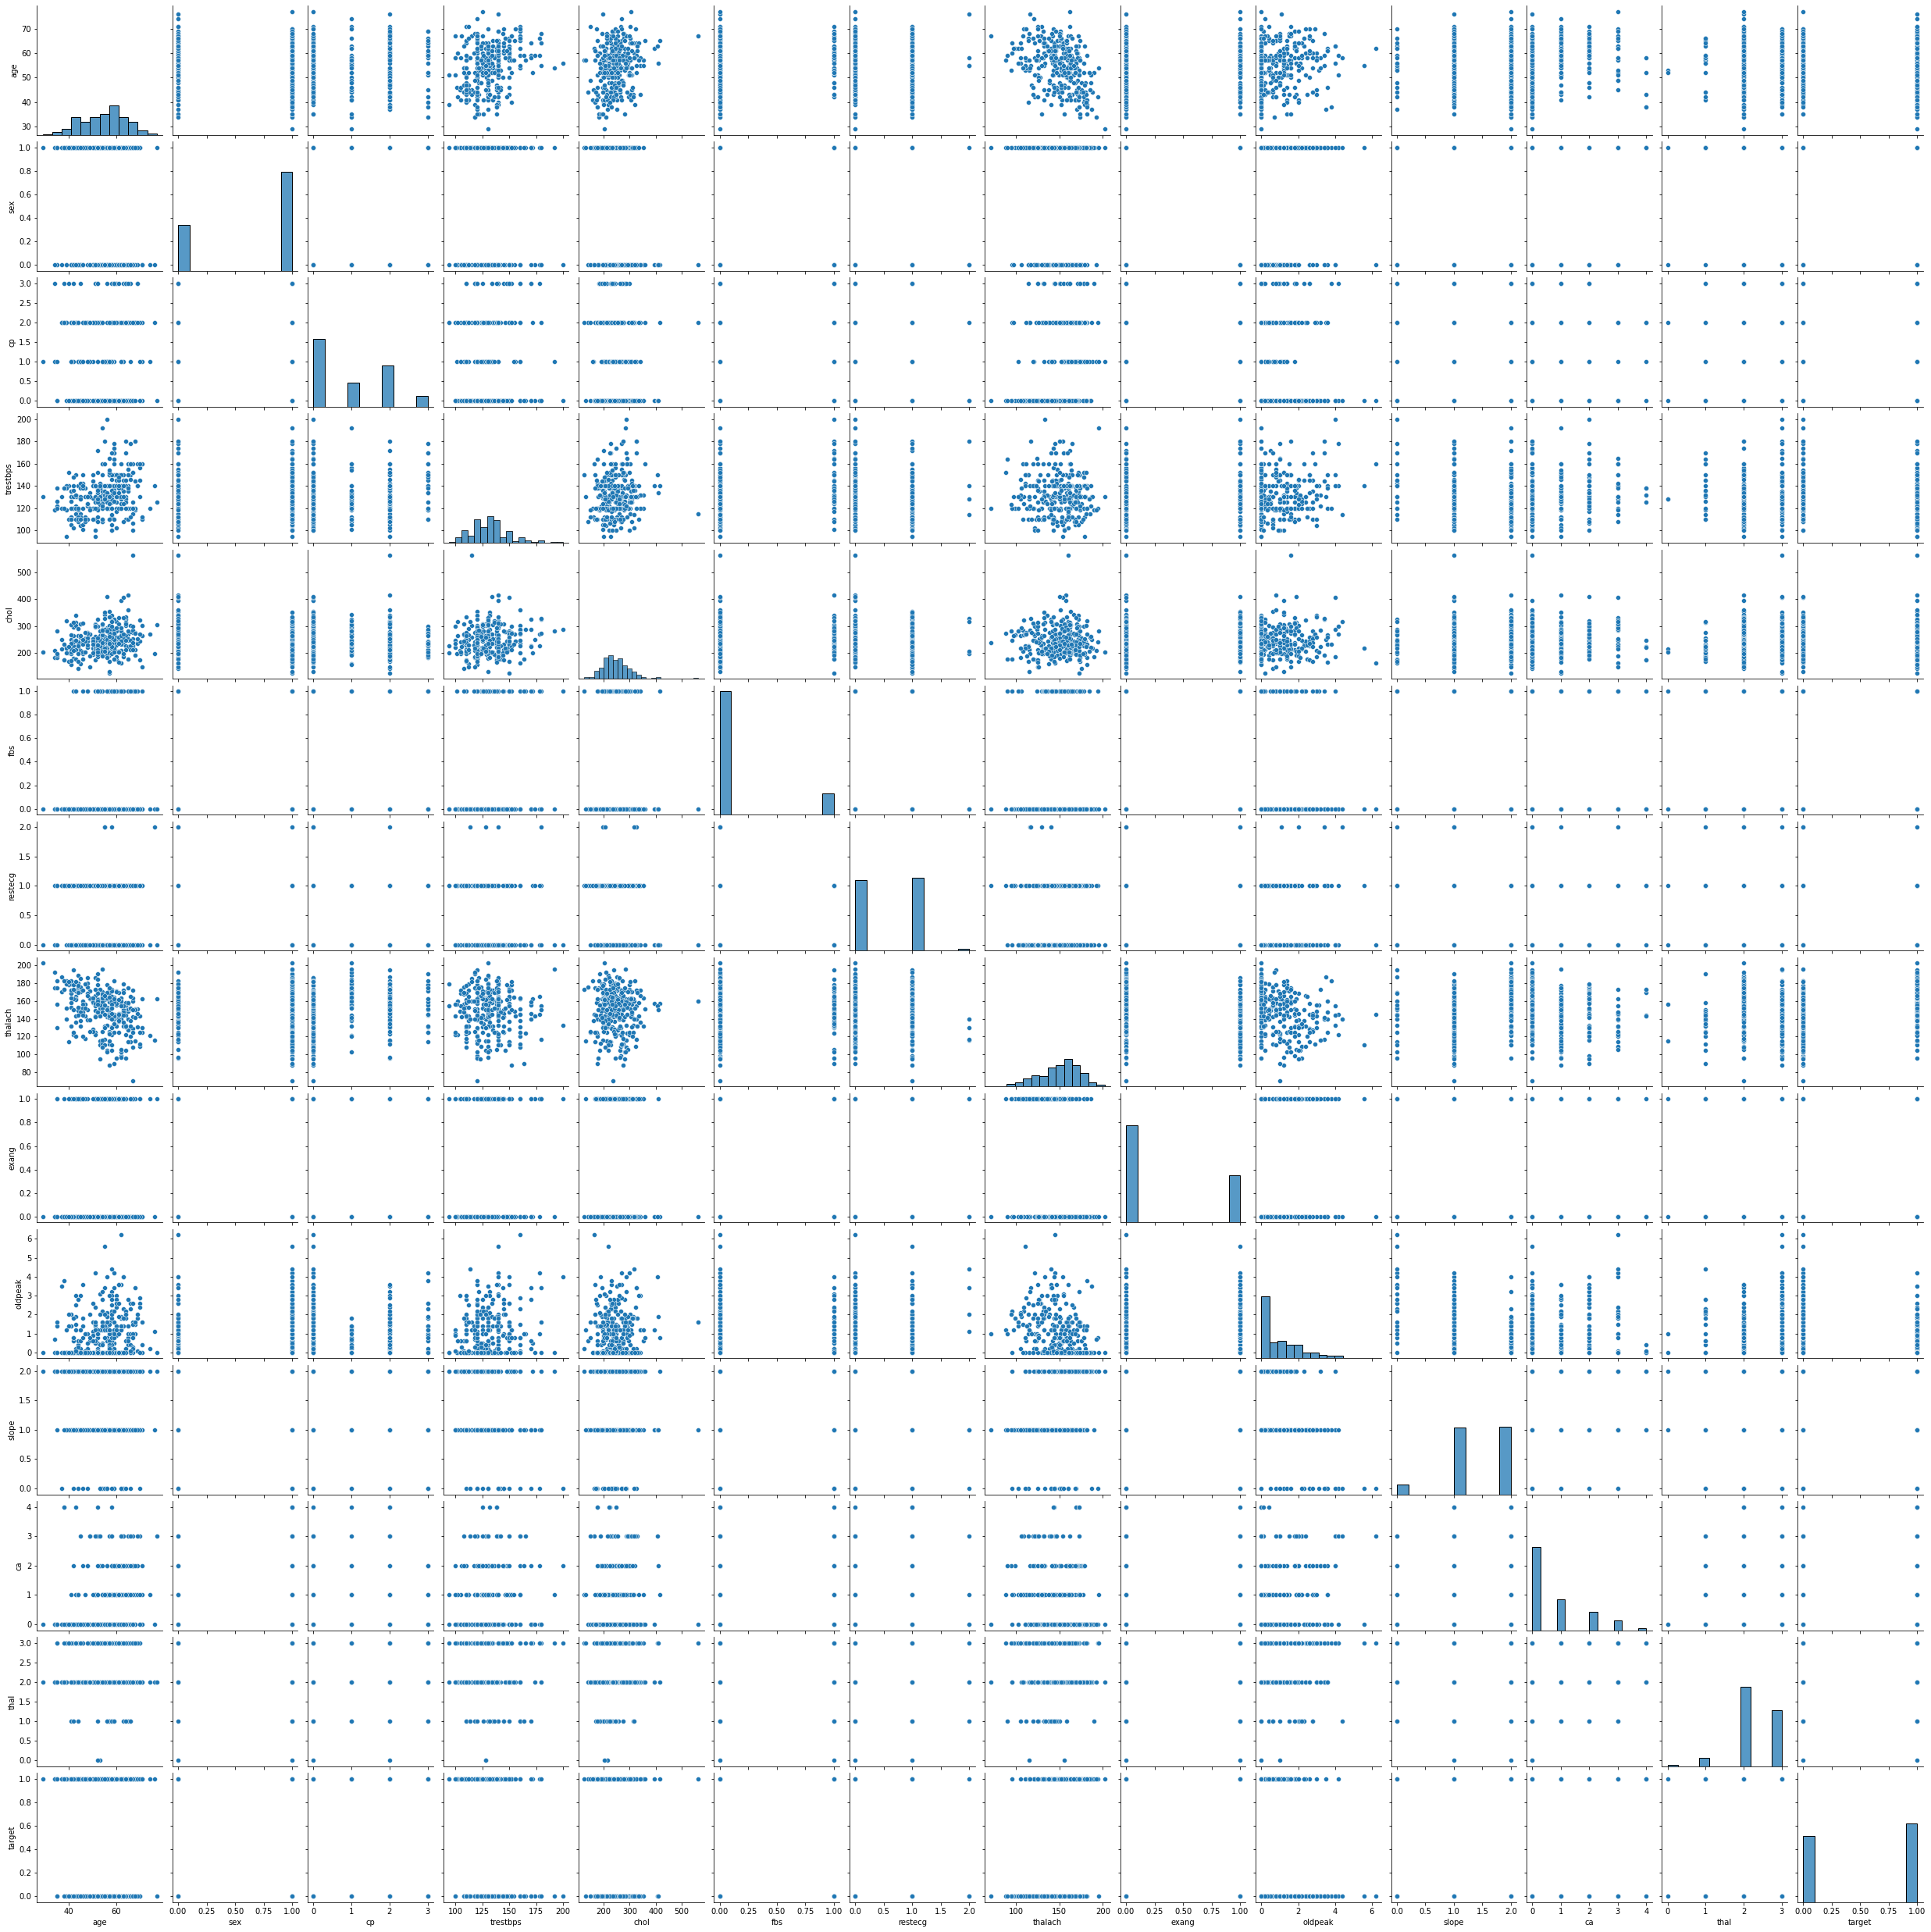

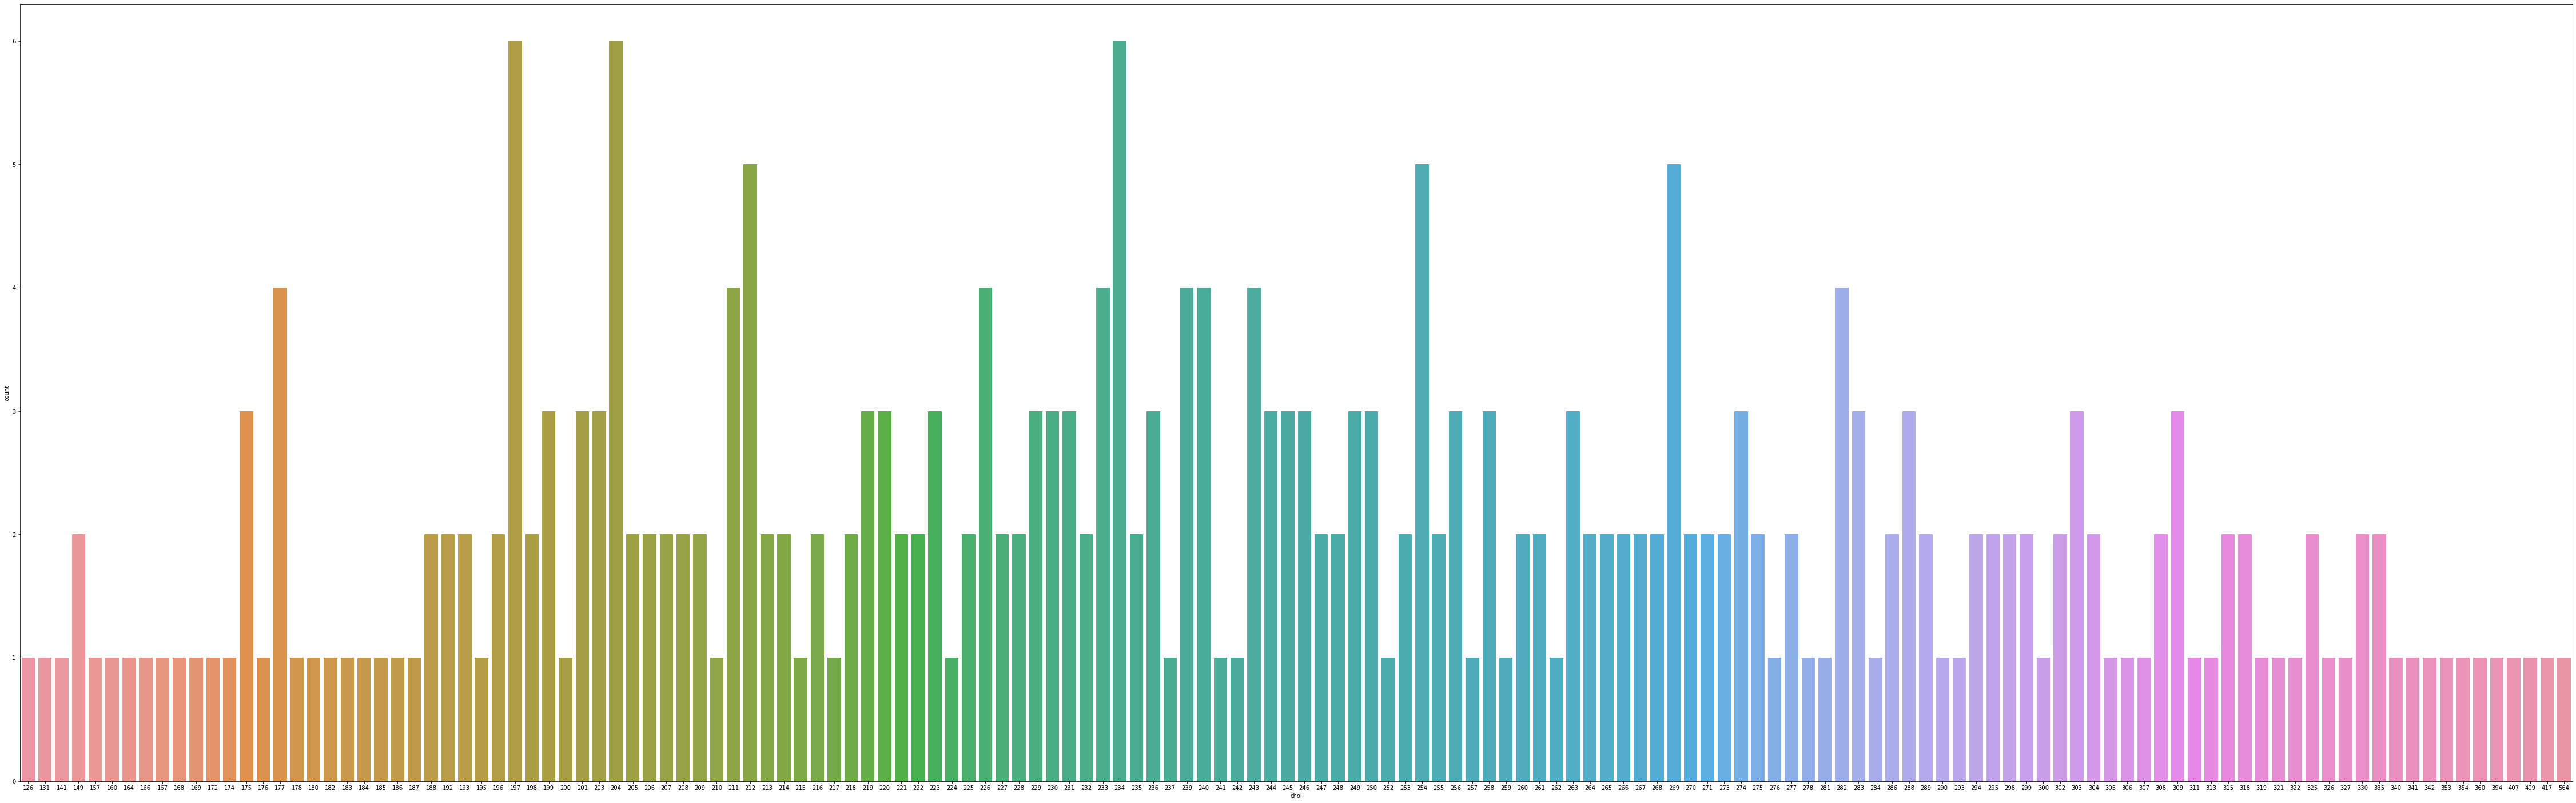

In [20]:
sns.pairplot(data=heart)
fig = plt.figure(figsize = (80,25))
sns.countplot(heart.chol)

C:\Users\maimm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


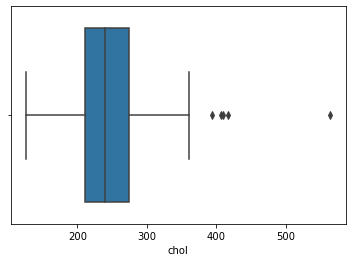

In [21]:
sns.boxplot(heart.chol)
heart1 = heart

Text(0.5, 1.0, 'Count of age values')

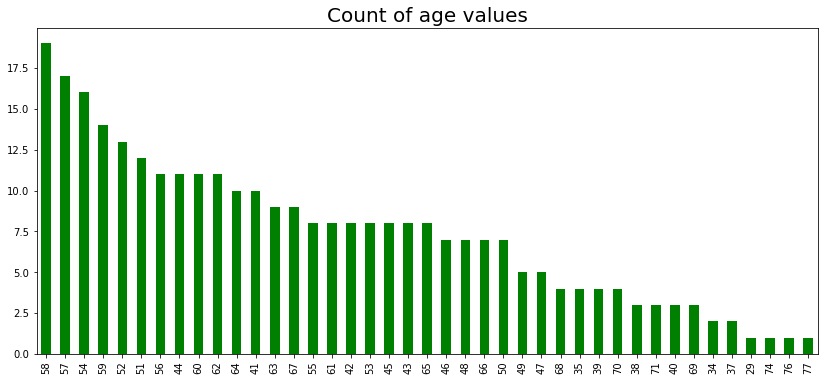

In [22]:
age = heart['age'].value_counts().sort_values(ascending=False)
age.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Count of age values", fontsize = 20)

In [23]:
df = pd.read_csv("heart.csv") # Read the data from the cvs file and store it in df 

# **3. Finding the Null values**

In [24]:
heart.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

age             AxesSubplot(0.125,0.71587;0.168478x0.16413)
sex          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
cp           AxesSubplot(0.529348,0.71587;0.168478x0.16413)
trestbps     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
chol           AxesSubplot(0.125,0.518913;0.168478x0.16413)
fbs         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
restecg     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
thalach     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
exang          AxesSubplot(0.125,0.321957;0.168478x0.16413)
oldpeak     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
slope       AxesSubplot(0.529348,0.321957;0.168478x0.16413)
ca          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
thal              AxesSubplot(0.125,0.125;0.168478x0.16413)
target         AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

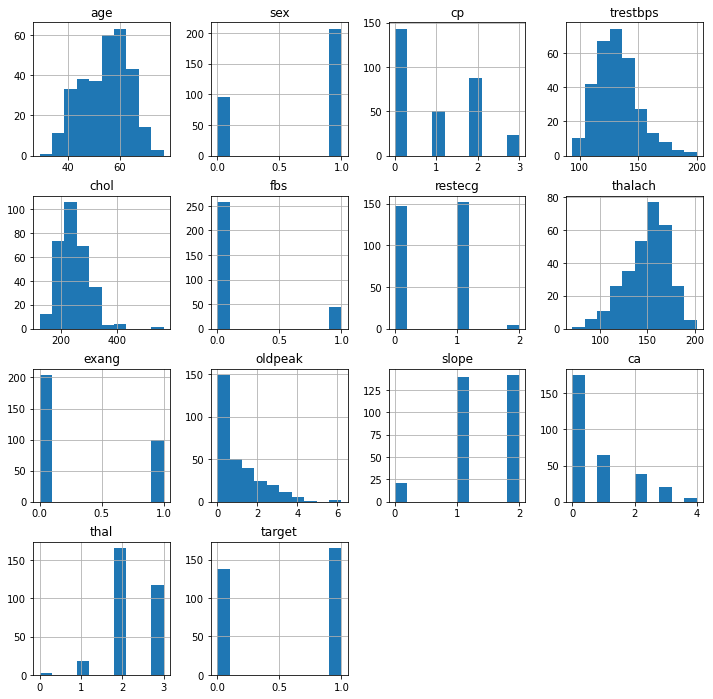

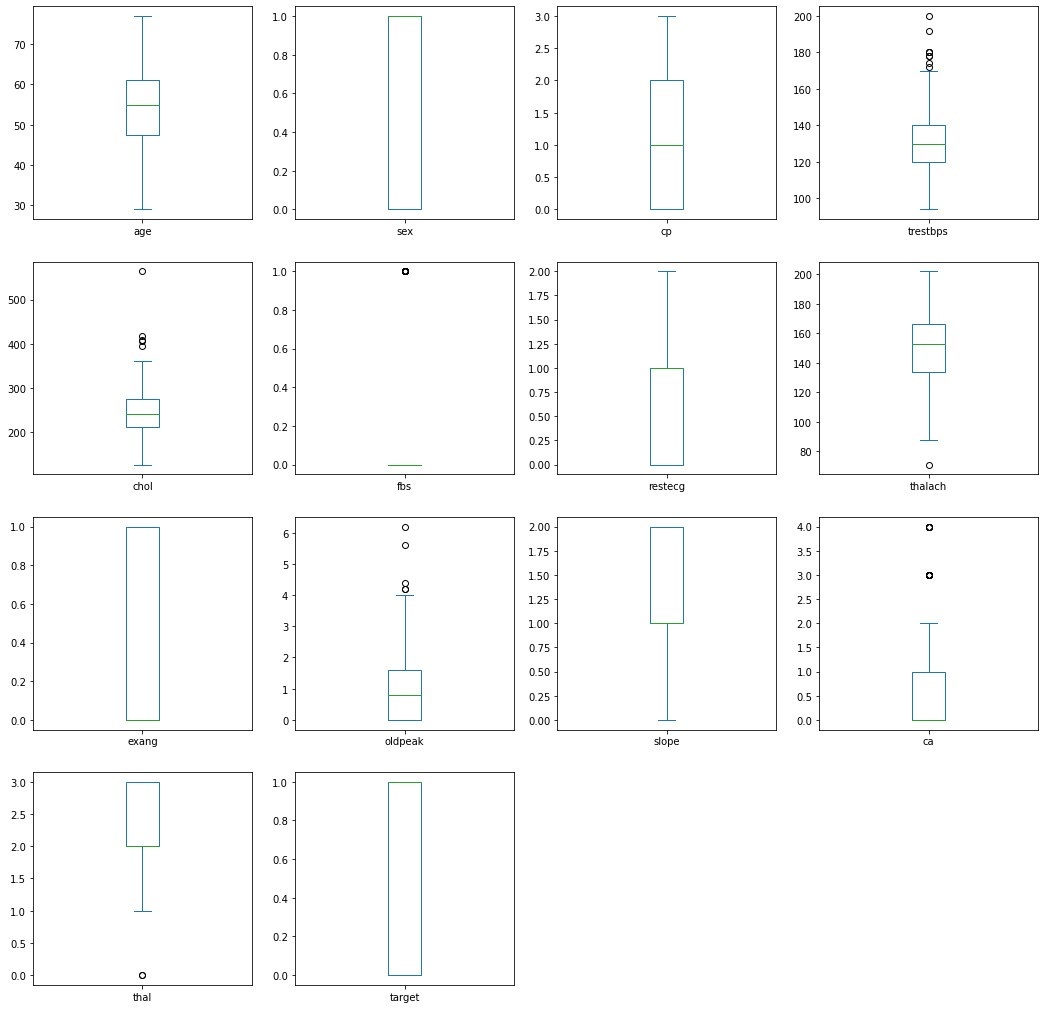

In [26]:
df.hist(figsize=(12,12)) #Understanding the data using Visualisation
df.plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False,figsize=(18,18))

In [27]:
df.corr() #Let us see that whether there is any relationship between the attributes.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


[Text(0, 0, 'age'),
 Text(0, 1, 'sex'),
 Text(0, 2, 'cp'),
 Text(0, 3, 'trestbps'),
 Text(0, 4, 'chol'),
 Text(0, 5, 'fbs'),
 Text(0, 6, 'restecg'),
 Text(0, 7, 'thalach'),
 Text(0, 8, 'exang'),
 Text(0, 9, 'oldpeak'),
 Text(0, 10, 'slope'),
 Text(0, 11, 'ca'),
 Text(0, 12, 'thal'),
 Text(0, 13, 'target')]

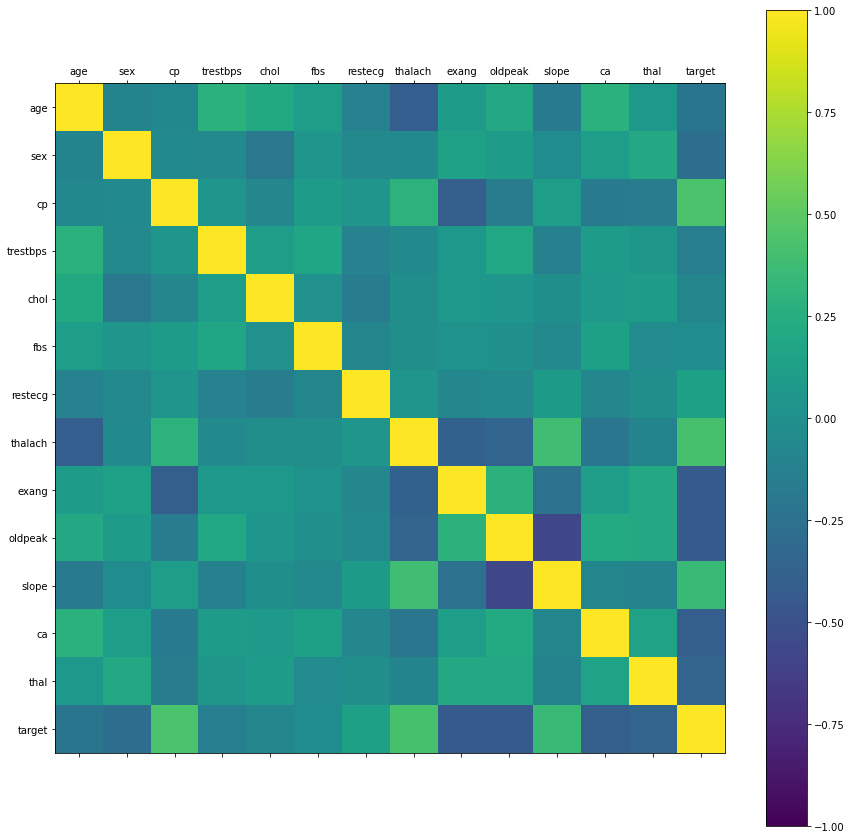

In [28]:
#We cannot get a proper picture with the above analysis, let us draw a correlation graph for our better understanding.
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111)
cax=ax.matshow(df.corr(),vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)

In [29]:
## Let us see that how many people are suffering from heart attack disease
df.groupby('sex').size()

sex
0     96
1    207
dtype: int64

In [30]:
df.groupby('target').size() 

target
0    138
1    165
dtype: int64

In [31]:
abc = pd.crosstab(df['sex'],df['target'])
abc

target,0,1
sex,,
0,24,72
1,114,93


In [32]:
abc = pd.crosstab(df['sex'],df['cp'])
abc

cp,0,1,2,3
sex,,,,
0,39,18,35,4
1,104,32,52,19


In [33]:
female_risk_percent = (len(df.loc[((df['sex']==0) & df['target']==1) ])/len(df.loc[df['sex']==0]))*100
male_risk_percent = (len(df.loc[((df['sex']==1) & df['target']==1) ])/len(df.loc[df['sex']==1]))*100
print('percentage males at risk : ',male_risk_percent)
print('percentage females at risk : ',female_risk_percent)

percentage males at risk :  44.927536231884055
percentage females at risk :  75.0


<AxesSubplot:xlabel='sex'>

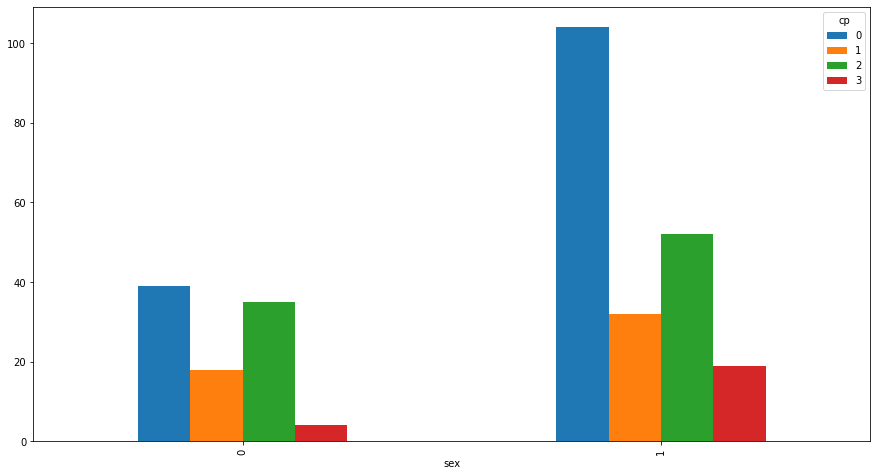

In [34]:
#We can see that the females are at greater risk of heart attack than males. Let us plot the graph between sex and target for a clearer view.
abc = pd.crosstab(df.sex,df.cp)
abc.plot(kind='bar',stacked=False,figsize=(15,8))

<AxesSubplot:xlabel='age'>

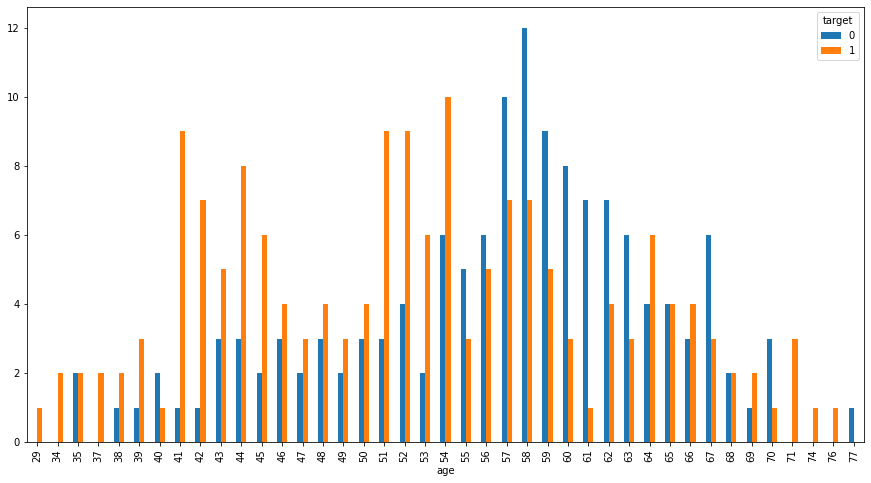

In [35]:
## We should also see that how different ages can have the risk of heart attack
#Let us draw a barplot between age and target.
xyz = pd.crosstab(df.age,df.target)
xyz.plot(kind='bar',stacked=False,figsize=(15,8))

<AxesSubplot:xlabel='cp'>

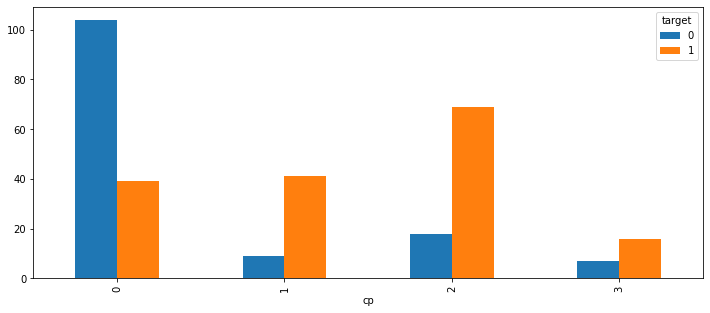

In [36]:
#We can see that the people between the age of 40 to 55 are at higher risk of heart attack.¶
## Let us see that how chestpain is related with heart attack.
pqr = pd.crosstab(df.cp,df.target)
pqr
pqr.plot(kind='bar',figsize=(12,5))

<AxesSubplot:xlabel='thal'>

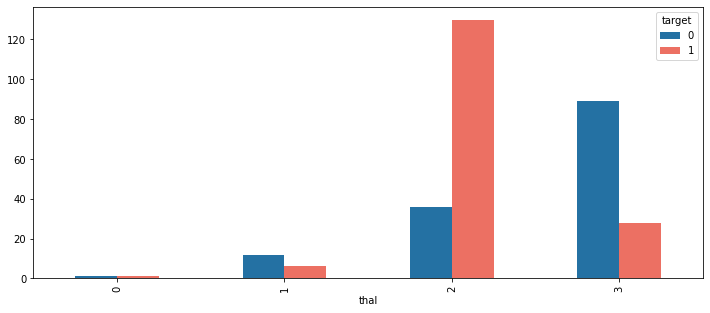

In [37]:
#We can see that if a person has chest pain type 2 ,then he has higher chance of heart attack and if a person has chest pain type 0 , then he has a very little risk of heart attack.
## See the relationship between thal and risk of heart attack
mno = pd.crosstab(df.thal,df.target)
mno
mno.plot(kind='bar', stacked=False, color=['#2471a3','#ec7063'],figsize=(12,5))

C:\Users\maimm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

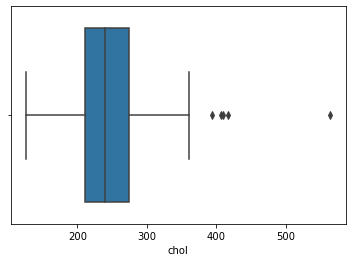

In [38]:
sns.boxplot(heart.chol)

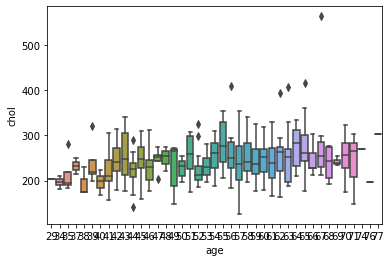

In [39]:
ax = sns.boxplot(x="age", y="chol", data=heart)

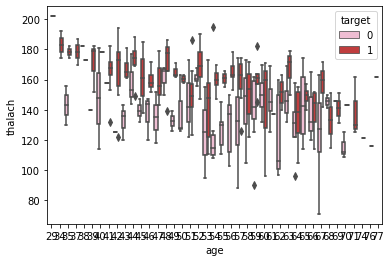

In [40]:
ax = sns.boxplot(x="age", y="thalach", hue="target",
                 data=heart, palette="tab20_r")

# **5. Droping the values**

In [41]:
#eart.drop("slope", axis=1, inplace=True)
#eart.head()

# **6. Replacing the Null Values**

In [42]:
m=np.mean(heart["chol"])
print(m)

246.26402640264027


In [43]:
heart["chol"].replace(to_replace = np.nan, value = m, inplace=True)
#heart["ca"].replace(to_replace = np.nan, value = 25, inplace=True)
#heart["exang"].replace(to_replace = np.nan, value = 5, inplace=True)
#heart["thalach"].replace(to_replace = np.nan, value = 90, inplace=True)
#heart["target"].replace(to_replace = np.nan, value = 1, inplace=True)
#heart("target", axis=1, inplace=True)

<AxesSubplot:ylabel='Frequency'>

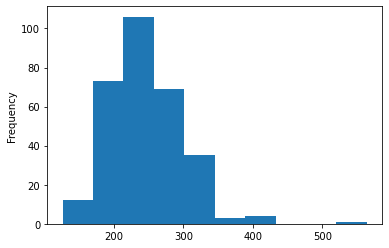

In [44]:
heart["chol"].plot.hist()

In [45]:
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


<AxesSubplot:>

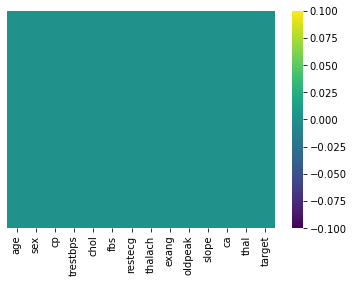

In [46]:
sns.heatmap(heart.isnull(), yticklabels=False, cmap="viridis")

In [47]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#  Linear Regression

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
heart = pd.read_csv("heart.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [50]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


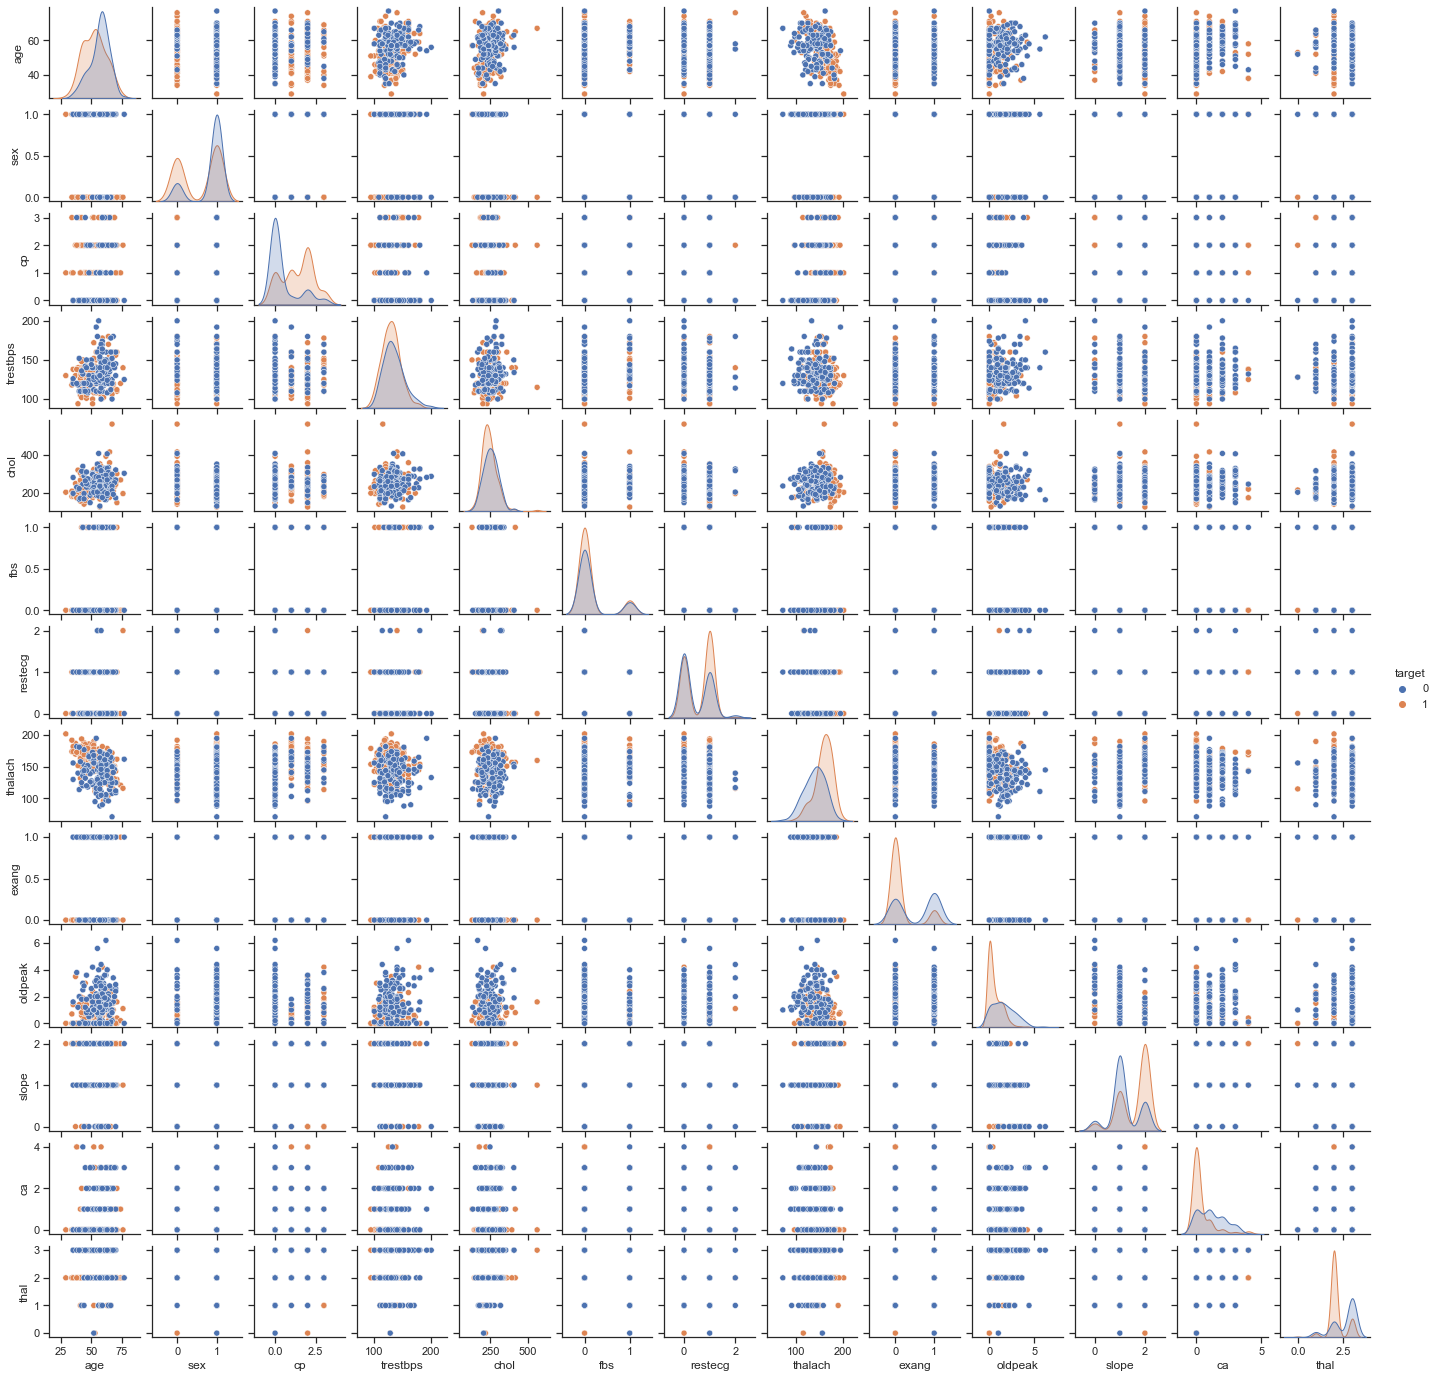

In [51]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(heart, hue='target', height=1.5);

# # Simple Linear Regression

### Training

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


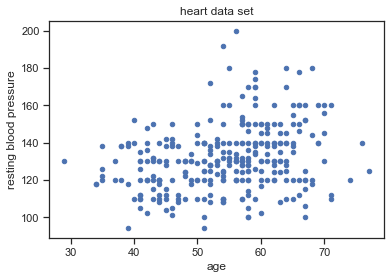

In [52]:
heart.plot.scatter(x='age', y='trestbps',
title="heart data set",
xlabel="age", ylabel="resting blood pressure");
#chol trestbps thalach

[Text(0.5, 1.0, ' data set'),
 Text(0.5, 0, 'age'),
 Text(0, 0.5, 'max heart rate')]

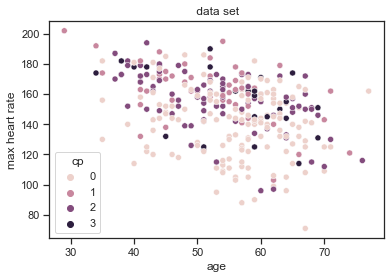

In [53]:
g = sns.scatterplot(data=heart, x='age', y='thalach',
hue='cp');
g.set(title = " data set",
xlabel = "age", ylabel = "max heart rate")

In [233]:
from sklearn.linear_model import LinearRegression

In [234]:
# age is the independent variable (predictor)
X_heart = heart['age'].to_frame()
y_heart = heart['trestbps'] #  is the dependent variable
# Use holdout method to split the dataset into training data and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_heart, y_heart, random_state=42)


In [235]:
model.fit(Xtrain, ytrain);

In [236]:
ypred = model.predict(Xtest)

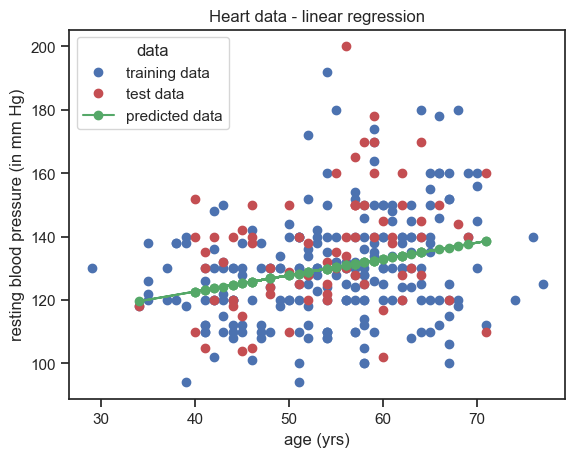

In [237]:
plt.plot(Xtrain, ytrain, 'bo', label="training data")
plt.plot(Xtest, ytest, 'ro', label="test data")
plt.plot(Xtest, ypred, 'go-', label="predicted data")
plt.title("Heart data - linear regression")
plt.xlabel("age (yrs)")
plt.ylabel("resting blood pressure (in mm Hg)")
plt.legend(title="data");


In [238]:
 model = LinearRegression() 

In [239]:
# age is the independent variable (predictor)
X_heart = heart['age'].to_frame()
y_heart = heart['trestbps'] # max heart rate is the dependent variable
# Use holdout method to split the dataset into training data and test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X_heart, y_heart, random_state=42)


In [240]:
model.fit(Xtrain, ytrain);

In [241]:
 ypred = model.predict(Xtest)

In [242]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest, ypred)
print("R-squared: %0.3f" % r2)

R-squared: -0.025


R-squared: -0.010


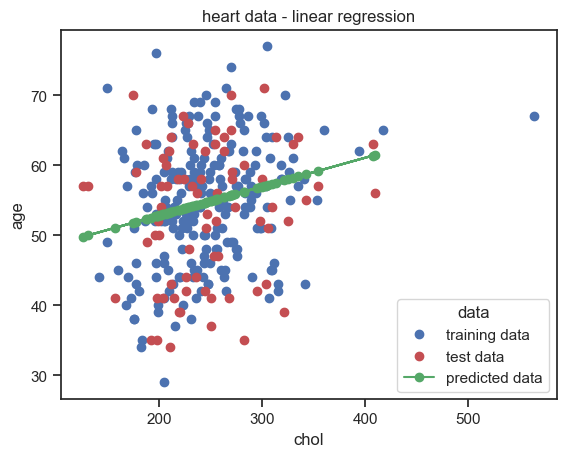

In [243]:
g = sns.scatterplot(data=heart, x='chol', y='age');
g.set(title = "heart data set",
      xlabel = "chol", ylabel = "target");
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X_heart = heart['chol'].to_frame()
y_heart = heart['age']        

 

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_heart, y_heart, random_state=45)
model.fit(Xtrain, ytrain);
ypred = model.predict(Xtest)
from sklearn.metrics import r2_score
r2 = r2_score(ytest, ypred)
print("R-squared: %0.3f" % r2)

 

plt.plot(Xtrain, ytrain, 'bo', label="training data")
plt.plot(Xtest, ytest, 'ro', label="test data")
plt.plot(Xtest, ypred, 'go-', label="predicted data")
plt.title("heart data - linear regression")
plt.xlabel("chol")
plt.ylabel("age")
plt.legend(title="data");

# #*7. Train and Test*

In [54]:
heart.drop("slope", axis=1, inplace=True)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,0,2,1


In [55]:
heart.drop("oldpeak", axis=1, inplace=True)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,ca,thal,target
0,63,1,3,145,233,1,0,150,0,0,1,1
1,37,1,2,130,250,0,1,187,0,0,2,1
2,41,0,1,130,204,0,0,172,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0,2,1
4,57,0,0,120,354,0,1,163,1,0,2,1


In [56]:
heart.drop("thal", axis=1, inplace=True)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,ca,target
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


In [57]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'ca', 'target'],
      dtype='object')

In [58]:
heart.columns = ['Age', 'Sex', 'CP', 'Bld Prssr', 'Chlstrl', 'Bld Sgr', 'ECG', 'Max HR',
       'Ex Angina', 'Vessels', 'HA Risk']
heart

,Age,Sex,CP,Bld Prssr,Chlstrl,Bld Sgr,ECG,Max HR,Ex Angina,Vessels,HA Risk
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,0
299,45,1,3,110,264,0,1,132,0,0,0
300,68,1,0,144,193,1,1,141,0,2,0
301,57,1,0,130,131,0,1,115,1,1,0


In [59]:
#ADD expl of variable

In [60]:
 heart.groupby('HA Risk').size()

HA Risk
0    138
1    165
dtype: int64

In [61]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        303 non-null    int64
 1   Sex        303 non-null    int64
 2   CP         303 non-null    int64
 3   Bld Prssr  303 non-null    int64
 4   Chlstrl    303 non-null    int64
 5   Bld Sgr    303 non-null    int64
 6   ECG        303 non-null    int64
 7   Max HR     303 non-null    int64
 8   Ex Angina  303 non-null    int64
 9   Vessels    303 non-null    int64
 10  HA Risk    303 non-null    int64
dtypes: int64(11)
memory usage: 26.2 KB


In [62]:
heart.describe()

,Age,Sex,CP,Bld Prssr,Chlstrl,Bld Sgr,ECG,Max HR,Ex Angina,Vessels,HA Risk
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,0.729373,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.022606,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.000000,1.000000


In [ ]:
import seaborn as sns
sns.pairplot(heart, hue='HA Risk', height=1.25);

### Classification Model

In [275]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()


In [276]:
X_heart = heart[['Age', 'Sex', 'CP', 'Bld Prssr', 'Chlstrl', 'Bld Sgr', 'ECG', 'Max HR',
       'Ex Angina', 'Vessels']]
Y_heart = heart['HA Risk']

In [277]:
y_heart = heart['Max HR'] # HA risk is the dependent (target) variable
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_heart, y_heart, random_state=0)

In [278]:
tree.fit(Xtrain, ytrain);

In [279]:
ypred = tree.predict(Xtest)
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest, ypred)
print("Accuracy: %0.2f%%" % (100 * acc))

Accuracy: 78.95%


In [259]:
###Analysing

In [284]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest, ypred, labels=tree.classes_)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

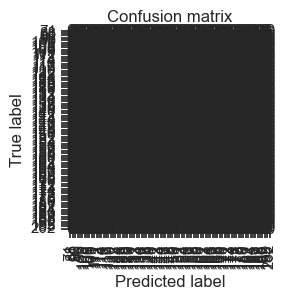

In [283]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2.6, 2.6))
ax = sns.heatmap(cm, vmin=0, vmax=0, cmap='gray_r', annot=True,
linewidths=0.5, linecolor='k', cbar=False,
xticklabels=tree.classes_, yticklabels=tree.classes_);
ax.set(title='Confusion matrix', xlabel='Predicted label', ylabel='True label')
# re-enable outer spines
sns.despine(left=False, right=False, top=False, bottom=False)

In [267]:
 print(pd.Series(ypred).groupby(ypred).size())

88     1
96     2
105    1
112    1
113    1
114    1
117    1
120    1
122    1
123    1
125    2
126    1
130    1
132    2
136    2
140    1
141    1
143    4
144    2
145    1
146    1
147    3
148    1
149    1
150    1
152    2
153    1
155    2
157    1
158    2
159    2
160    1
161    1
162    3
163    3
164    2
165    1
166    1
168    2
169    2
170    1
171    2
172    2
173    2
174    2
177    1
178    1
179    1
181    1
186    1
187    1
dtype: int64


# Conclusion:
    # 1) Patients' age have normal distribution with an average at 54 years old.
    # 2) The minimum and maximum resting blood pressure (trtbps) among the patients
         # at 94 mmHg and 200 mmHg respectively with average at 131 mmHg.
    # 3) The minimum and maximum cholesterol (chol) among the patients
         # at 126 mg/dl and 564 mg/dl respectively with average at 246 mg/dl.
    # 4) The patients maximum heart rate achieved distribution 
         # is a little bit negatively skewed. The minimum and maximum heart rate 
         # achieved (thalachh) among the patients at 71 BPM and 202 BPM 
         # respectively with average at 149 BPM.
    # 5) The oldpeak distribution is rightly skewed (positively skewed) with
         # minimum and maximum at 0 and 6.2 respectively. Meanwhile tha average
         # at 1.
    # 6) The maximum resting blood pressure at 200mmHg indicates extremely 
         # high blood pressure and leads to stroke
    # 7) For someone has cholesterol level of 564 mg/dl is possible especially
         # for someone with familial hypercholesterolemia.